<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/Moringa_core_wk4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Car Usage Hypothesis Testing 

The Bolloré Bluecar is a small four-seat, three-door electric car supplied by Bollore, a french company whose interests lie in developing technology infrastructure systems across various sectors. The Bluecar uses a Lithium Metal Polymer(LMP) battery which is rechargeable, reusable, and recyclable. The LMP battery carries more energy than normal batteries. The bluecar can cover a distance of 200km with a full charge. The Bluecar also has a GPS for tracking. The car is ordered online before the customer can pick it up at the station.
The customer is charged a monthly membership fee plus an additional cost per minute with a minimum fee for the first 20 minutes.


Link to Google document:

https://docs.google.com/document/d/1IEL8JkrFoCvzYNjXds0hyDh56MTSOwmFzxLe7LxYpQU/edit?usp=sharing

## 1. Defining the question

### a) Specifying the Data Analytic Question(In this case our hypothesis)

The number of bluecars taken in area 75015 is larger than the number of bluecars taken in area 75016. We shall prove or disapprove this theory in an attempt to discover the area with the highest number of customers which should be proportional to the sum of bluecars in the area.

<b>Null hypothesis : There is no difference between the number of bluecars taken in the area postal code 75015 and area postal code 75016.

Alternate hypothesis: The number of bluecars taken in area postal code 75015 is larger than that in area postal code 75016.</b>

### b) Defining the Metric for Success

Proving our test statistically significant by rejecting the null hypothesis in favour of the alternate hypothesis

### c) Understanding the context

We need to prove that the area postal code 75015 has a larger number of bluecars compared to area postal code 75016.

### d) Recording the Experimental Design

1. Import necessary libraries 
2. Read in our data.
3. Understand our data.
4. Validate our data.
5. Remove outliers, check for anomalies and perform other data cleaning measures.
6. Perform univariate and bivariate EDA.
7. Generate appropriate sample for hypothesis Testing.
8. Perform Hypothesis Testing using appropriate test.
9. Make decision.
10. Make conclusion.

### e) Data Relevance

The data contains postal codes of several areas where the autolib service is available. The data also contains number of bluecars taken from each postal code for a period of 156 days.

## 2. Importing our libraries

In [ ]:
# importing pandas for dataframe manipulation
import pandas as pd

# importing numpy for numerical manipulation
import numpy as np

# import pyplot from matplotlib and seaborn for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Reading the data

In [ ]:
# we have been tasked to understand electric car usage by solving for another research question.
# We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate
# a claim about the blue cars from the provided Autolib dataset.
# url = http://bit.ly/DSCoreAutolibDataset

url = 'http://bit.ly/DSCoreAutolibDataset'
#file_id = split('/')[-2]
df = pd.read_csv(url, sep=',')

In [334]:
!curl 'http://bit.ly/DSCoreAutolibDataset'

<html>
<head><title>Bitly</title></head>
<body><a href="https://archive.org/download/autolib_daily_events_postal_code/autolib_daily_events_postal_code.csv">moved here</a></body>
</html>

## Checking the data

In [ ]:
# Display the first 5 rows of our datset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Display the last 5 rows of our datset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# This info tell us about the datatypes of our dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


Our dataset has 13 columns and 16085 rows. Our dataset has no null values.

In [ ]:
# Convert postalcode to string
df['Postal code'] = df['Postal code'].astype(str)


## External source validation

### a.) Validation

In [333]:
# Validate our data source

# The presence of the dataset http://bit.ly/autolib_dataset
# validates our data

dfv = pd.read_csv('http://bit.ly/autolib_dataset')
dfv.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23


## Tidying the dataset

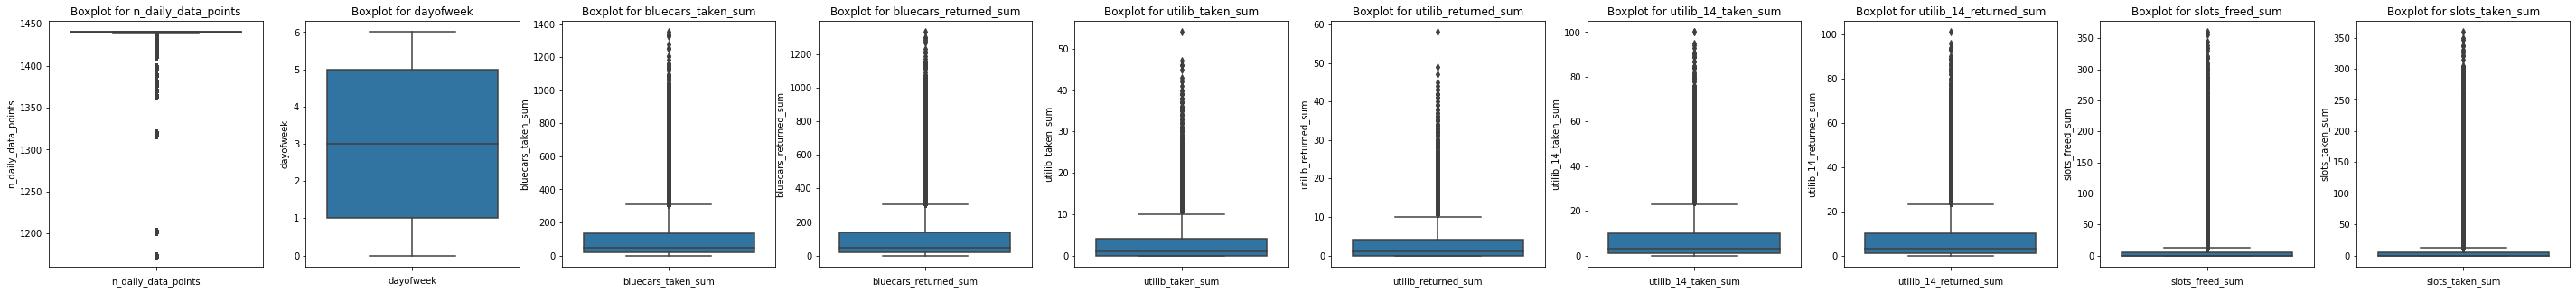

In [255]:
# checking for outliers
columns = []
all = [column for column in df.columns]

for column in df.columns:
  if df[column].dtypes != 'O':
    columns.append(column)

fig , ax = plt.subplots(ncols=len(columns), figsize=(50,5))

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(f'Boxplot for {col}')
    ax[i].set_xlabel(col)

plt.show()


The data contains several outliers hence may not necessarily be outliers. We shall investigate this by checking for anomalies.

In [ ]:
# Checking for anomalies

# Use column list above

# Outliers

def percentile_outliers(columns):
    for column in columns:
        q1, q3 = np.percentile(df[column], [25, 75]) 
        iqr = q3 - q1
        l_bound = q1 - (1.5*iqr)
        u_bound = q3 + (1.5 * iqr)
        print(f'Interquatile range for {column} : {iqr}')
# {df[(df[column] <l_bound) | (df[column] > u_bound)]}
percentile_outliers(columns)

Interquatile range for n_daily_data_points : 1.0
Interquatile range for dayOfWeek : 4.0
Interquatile range for BlueCars_taken_sum : 115.0
Interquatile range for BlueCars_returned_sum : 115.0
Interquatile range for Utilib_taken_sum : 4.0
Interquatile range for Utilib_returned_sum : 4.0
Interquatile range for Utilib_14_taken_sum : 9.0
Interquatile range for Utilib_14_returned_sum : 9.0
Interquatile range for Slots_freed_sum : 5.0
Interquatile range for Slots_taken_sum : 5.0


In [ ]:
# Check for sum values less than 0 from each numeric
# column
def negative(column):
  return df[df[column] < 0]

In [ ]:
for column in columns:
  print(negative(column))

# There are no negative values

Empty DataFrame
Columns: [Postal code, date, n_daily_data_points, dayOfWeek, day_type, BlueCars_taken_sum, BlueCars_returned_sum, Utilib_taken_sum, Utilib_returned_sum, Utilib_14_taken_sum, Utilib_14_returned_sum, Slots_freed_sum, Slots_taken_sum]
Index: []
Empty DataFrame
Columns: [Postal code, date, n_daily_data_points, dayOfWeek, day_type, BlueCars_taken_sum, BlueCars_returned_sum, Utilib_taken_sum, Utilib_returned_sum, Utilib_14_taken_sum, Utilib_14_returned_sum, Slots_freed_sum, Slots_taken_sum]
Index: []
Empty DataFrame
Columns: [Postal code, date, n_daily_data_points, dayOfWeek, day_type, BlueCars_taken_sum, BlueCars_returned_sum, Utilib_taken_sum, Utilib_returned_sum, Utilib_14_taken_sum, Utilib_14_returned_sum, Slots_freed_sum, Slots_taken_sum]
Index: []
Empty DataFrame
Columns: [Postal code, date, n_daily_data_points, dayOfWeek, day_type, BlueCars_taken_sum, BlueCars_returned_sum, Utilib_taken_sum, Utilib_returned_sum, Utilib_14_taken_sum, Utilib_14_returned_sum, Slots_freed_

In [ ]:
# Check dates
print(df['date'].min(), df['date'].max())


1/1/2018 6/9/2018


In [ ]:
len(df['date'].unique())

156

Data was collected from 1/1/2018 to 6/9/2018, a period of 156 days.

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

### e.) Uniformity

In [ ]:
# Convert the date to datetime

from datetime import datetime as dt
   
df['date'] = pd.to_datetime(df['date']).dt.date

In [ ]:
# Order dataset by date from the earliest to the most recent.
df = df.sort_values(by='date', ascending=1)

In [ ]:
# Check for whitespaces
print(df.columns)

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')


In [ ]:
# Rename columns for uniformity
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

## Exploratory Data Analysis  

### Univariate EDA

In [ ]:
df.describe(include='all')

# **** Population Mean *****
# n_daily_data_points = 1431.330619	
# bluecars taken sum = 125.926951	
# bluecars_returned_sum = 125.912714
# utilib_taken_sum = 3.698290
#	utilib_returned_sum = 	3.699099
# utilib_14_taken_sum = 8.600560	
# utilib_14_returned_sum = 8.599192	
#	slots_freed_sum = 22.629033	
# slots_taken_sum = 22.629282

# **** Population Min Values and Max values (Range) *****
# n_daily_data_points = 1174 to 1440
# bluecars taken sum = 0 to 1352	
# bluecars_returned_sum = 0 to 1332
# utilib_taken_sum = 0 to 54
#	utilib_returned_sum = 0 to 58
# utilib_14_taken_sum = 0 to 100	
# utilib_14_returned_sum = 0 to 101	
#	slots_freed_sum = 0 to 360	
# slots_taken_sum = 0 to 359

								
# **** Population Standard deviation Values *****
# n_daily_data_points = 33.212050
# bluecars taken sum = 	185.426579
# bluecars_returned_sum = 185.501535
# utilib_taken_sum = 5.815058
#	utilib_returned_sum =5.824634
# utilib_14_taken_sum = 12.870098
# utilib_14_returned_sum = 12.868993	
#	slots_freed_sum = 52.120263
# slots_taken_sum = 52.146030

# **** Population Median Values *****
# n_daily_data_points = 1440
# bluecars taken sum = 46	
# bluecars_returned_sum = 46
# utilib_taken_sum = 1
#	utilib_returned_sum = 1
# utilib_14_taken_sum = 3	
# utilib_14_returned_sum = 3	
#	slots_freed_sum = 0	
# slots_taken_sum = 0

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,104,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,75001,2018-05-20,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,156,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,NaN,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,NaN,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,NaN,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [ ]:
# plot bar function
def plot_bar(column, figsize):
  df[column].value_counts().plot.bar(figsize=figsize, grid=True)
  plt.title('Bar Chart for {}'.format(column))
  plt.xlabel(column)
  return plt.show()



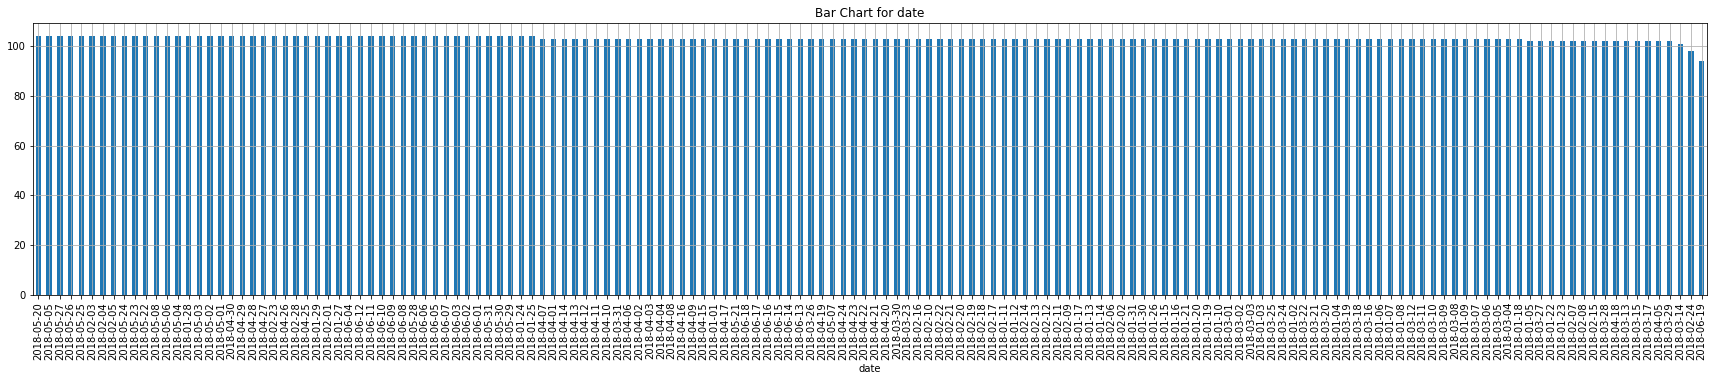

In [ ]:
# Dates included in the dataset
plot_bar('date', (30,5))

# All days have been nearly equally represented except the last two days

In [ ]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
11180,93300,2018-01-01,1440,0,weekday,12,13,0,0,0,1,0,0
9655,92700,2018-01-01,1440,0,weekday,109,104,3,2,17,14,0,0
9188,92420,2018-01-01,1440,0,weekday,12,9,0,0,4,3,0,0
1716,75012,2018-01-01,1440,0,weekday,502,512,7,6,32,35,122,120


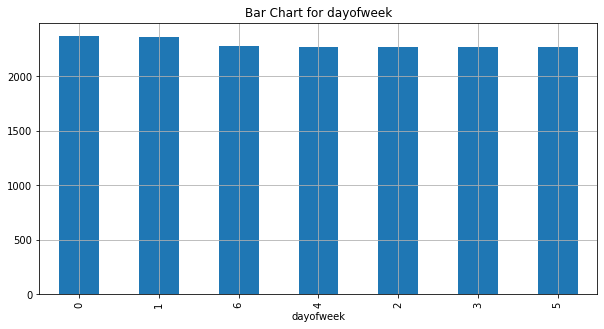

In [ ]:
# Days of the week representation

plot_bar('dayofweek', (10,5))

# Day of week 0 and 1 have the highest representation. 
# Since we do not know which day was day 0 according to the data collector,
# we cannot fully interpret whether the first day of the week was Sunday or Monday.

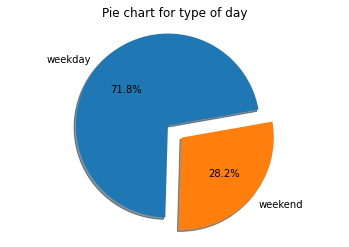

In [ ]:
# type of day representation

# plot pie chart
daytype = df.groupby(['day_type'], as_index=False)['dayofweek'].count()
labels = daytype['day_type']
count = daytype['dayofweek']
explode = (0,0.2)

plt.pie(count, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=10)
plt.title('Pie chart for type of day')
plt.axis('equal')
plt.show()

# Weekdays as expected have higher value counts than weekends

### Bivariate EDA

a.) Numerical to numerical

In [ ]:
# Find correlation between variables
df.corr()

,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
n_daily_data_points,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayofweek,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
bluecars_taken_sum,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
slots_taken_sum,0.021169,0.050468,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


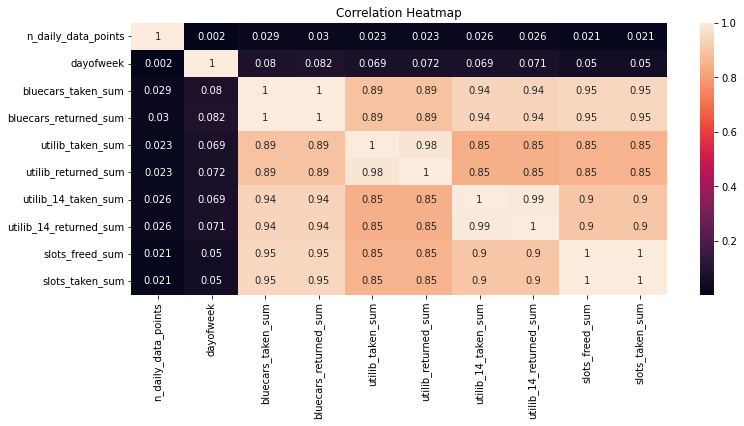

In [ ]:
# Draw correlation heatmap
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# There is very strong positive correlation(1) between sum of cartype taken and sum of cartype returned.
# This implies that the cars are usually returned to their station aftr use.
# There is also a strong positive correlation between slots taken and slots freed. 
# There is a strong positive correlation also between the cars i.e
# bluecars taken correlates with utilibs and utilib14 taken or returned and
#  bluecars returned correlates with utilibs and utilib14 taken or returned.
# n_daily_data_points and day of the week have very weak positive correlation with all variables.


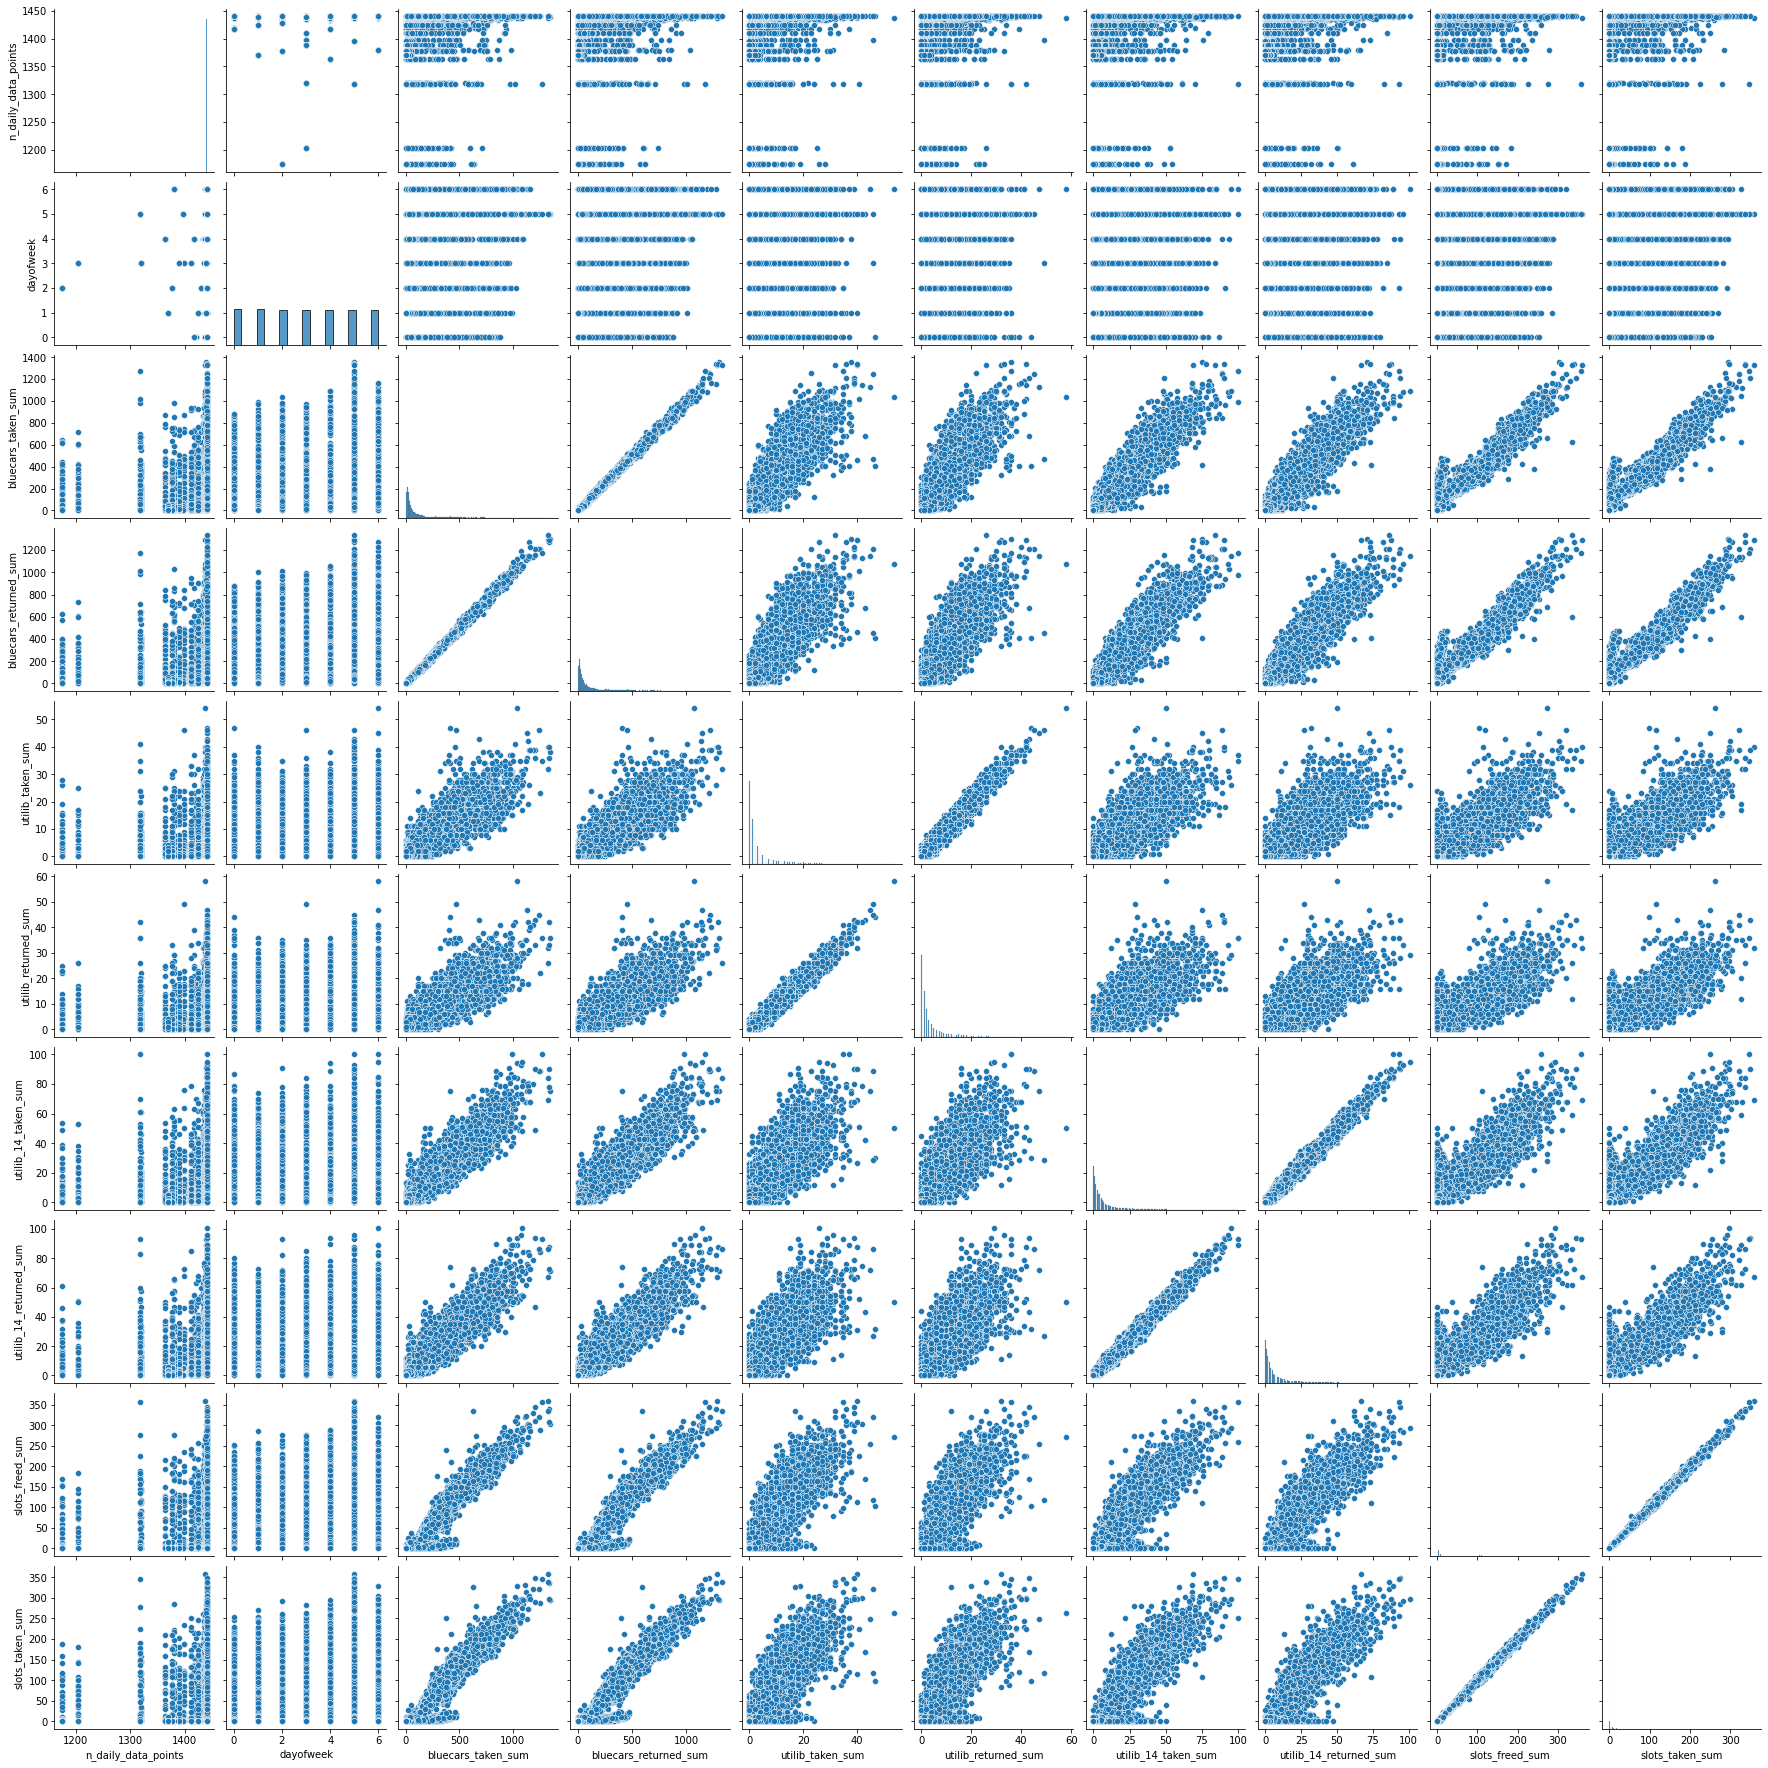

In [ ]:
# Pairplot
sns.pairplot(df)

# The scatterplot also proves very strong correlation between variables

From the heatmap above, we note that bluecars_taken_sum = bluecars_returned_sum. This because correlation of 1 implies no variance between the two variables hence bluecars taken also represents bluecars returned.

For other cartypes, correlation is also very close to 1 implying very little variability. 

Since there is no difference between cars taken and cars returned, we can simply drop the cars returned columns and use the cars taken column knowing that they are returned later to the station.

b.) Categorical to categorical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


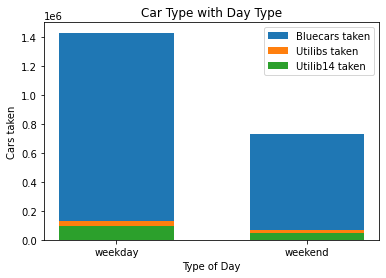

In [ ]:
# Cars taken for type of day 

data = df.groupby(['day_type'], as_index=False)['bluecars_taken_sum', 'utilib_taken_sum', 'utilib_14_taken_sum'].sum()
data

columns = list(data['day_type'].unique())
bluecars = list(data['bluecars_taken_sum'])
utilibs = list(data['utilib_taken_sum'])
utilib14 = list(data['utilib_14_taken_sum'])

# Plot a stacked barchart
plt.bar(columns, bluecars, width=0.6, label='Bluecars taken', bottom= utilib14)
plt.bar(columns, utilibs, width=0.6, label='Utilibs taken', bottom=utilib14)
plt.bar(columns, utilib14, width=0.6, label='Utilib14 taken')

# Labels
plt.title('Car Type with Day Type')
plt.xlabel('Type of Day')
plt.ylabel('Cars taken')

# Creating a key/legend for our chart
plt.legend(loc="upper right")

plt.show()

# Bluecars are the most borrowed followed by utilib14 and lastly utilibs
# There are more cars borrowed during the weekdays than weekends

c.) Categorical to numerical

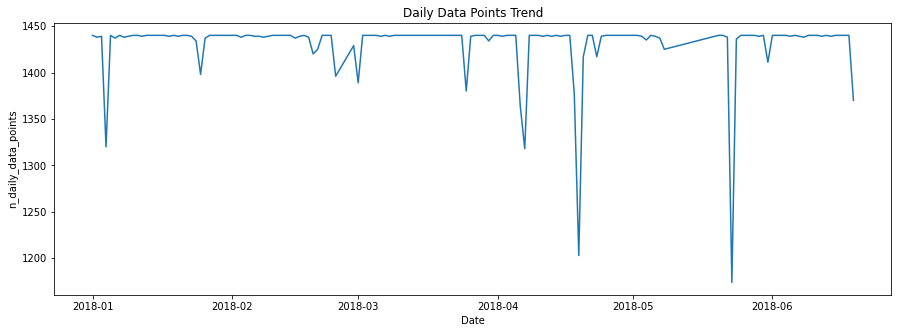

In [ ]:
# Daily data points Trend
plt.figure(figsize=(15,5))
data = df.groupby(['date','day_type'], as_index=False)['n_daily_data_points'].mean()
plt.plot(data['date'], data['n_daily_data_points'])

#Labels
plt.title('Daily Data Points Trend')
plt.xlabel('Date')
plt.ylabel('n_daily_data_points')
plt.show()

# There are days with sudden drops in daily points.

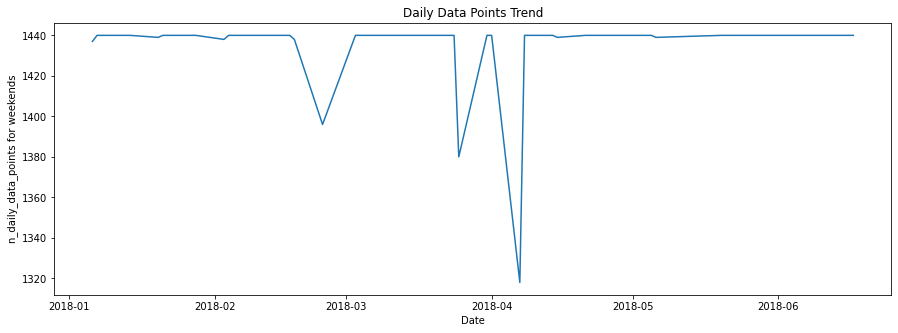

In [ ]:
# Daily data points Trend on Weekends
data_weekends = data[data['day_type'] == 'weekend']
plt.figure(figsize=(15,5))
plt.plot(data_weekends['date'], data_weekends['n_daily_data_points'])


#Labels
plt.title('Daily Data Points Trend')
plt.xlabel('Date')
plt.ylabel('n_daily_data_points for weekends')

plt.show()
# There is a sudden drop in daily points towards the end of March and beginning of April.

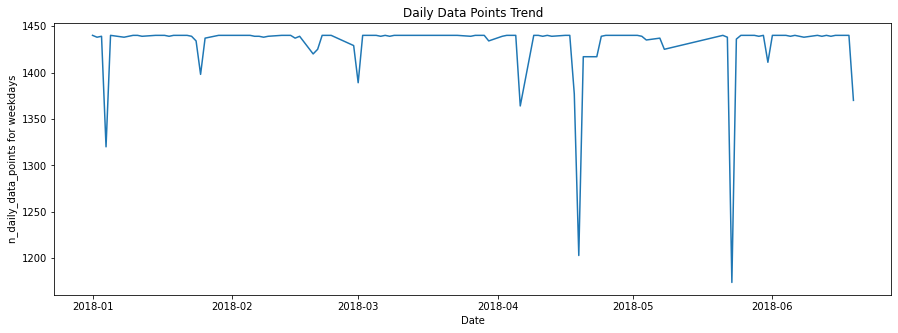

In [ ]:
# Daily data points Trend on Weekdays
data_weekdays = data[data['day_type'] == 'weekday']
plt.figure(figsize=(15,5))
plt.plot(data_weekdays['date'], data_weekdays['n_daily_data_points'])


#Labels
plt.title('Daily Data Points Trend')
plt.xlabel('Date')
plt.ylabel('n_daily_data_points for weekdays')

plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


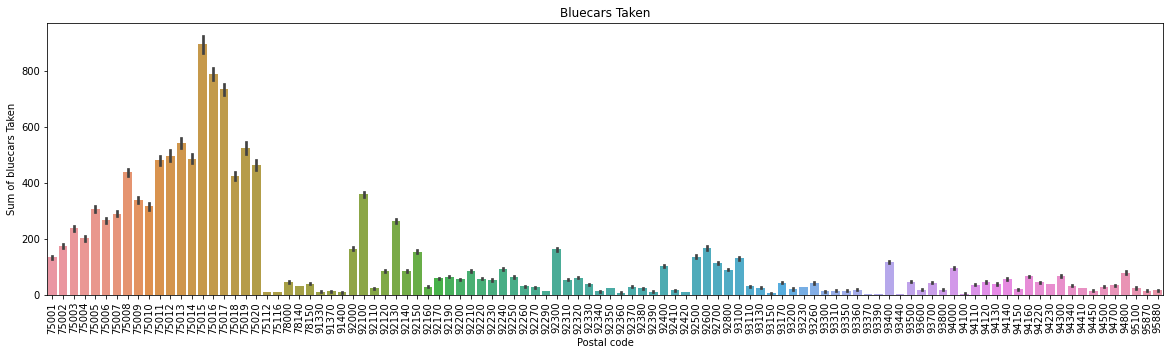

In [ ]:
# Cars taken for each postal code

plt.figure(figsize= (20,5))
sns.barplot(df['postal_code'].sort_index(), df['bluecars_taken_sum'])

plt.title('Bluecars Taken')
plt.xlabel('Postal code')
plt.ylabel('Sum of bluecars Taken')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


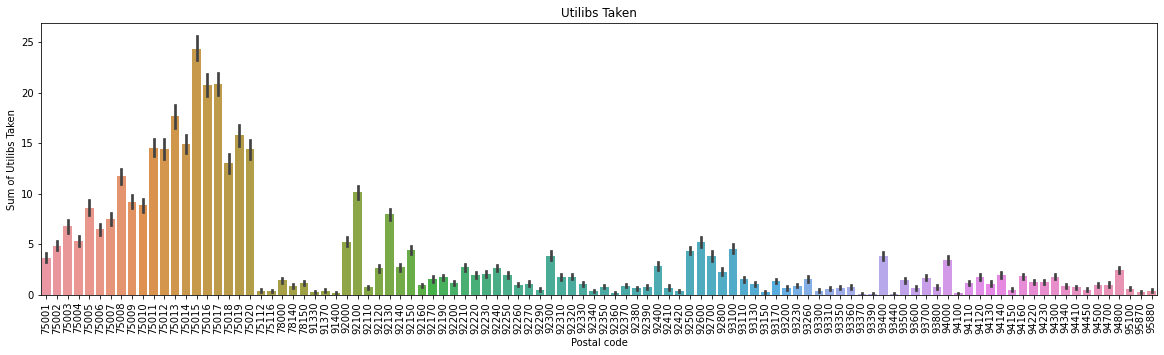

In [ ]:
# Cars taken for each postal code

plt.figure(figsize= (20,5))
sns.barplot(df['postal_code'].sort_index(), df['utilib_taken_sum'])

plt.title('Utilibs Taken')
plt.xlabel('Postal code')
plt.ylabel('Sum of Utilibs Taken')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


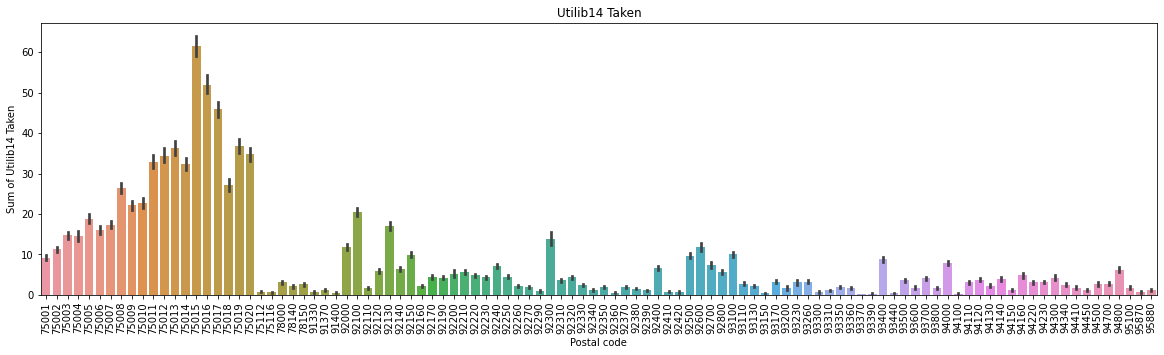

In [ ]:
# Cars taken for each postal code

plt.figure(figsize= (20,5))
sns.barplot(df['postal_code'].sort_index(), df['utilib_14_taken_sum'])

plt.title('Utilib14 Taken')
plt.xlabel('Postal code')
plt.ylabel('Sum of Utilib14 Taken')
plt.xticks(rotation=90)
plt.show()

 It is evident that there are more customers in the area postal code 75* compared to other areas since the sum of bluecars, utilibs and utilibs_14 taken is larger. This is also shown by the fact that there are more postal codes in that area to meet high demand of autolib service. Postal code 75015 has the highest demand in the dataset. Area postal code 78*, 91* and 95* have the least representation and also very few customers. Area code 93* has very few customers despite having several postal codes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


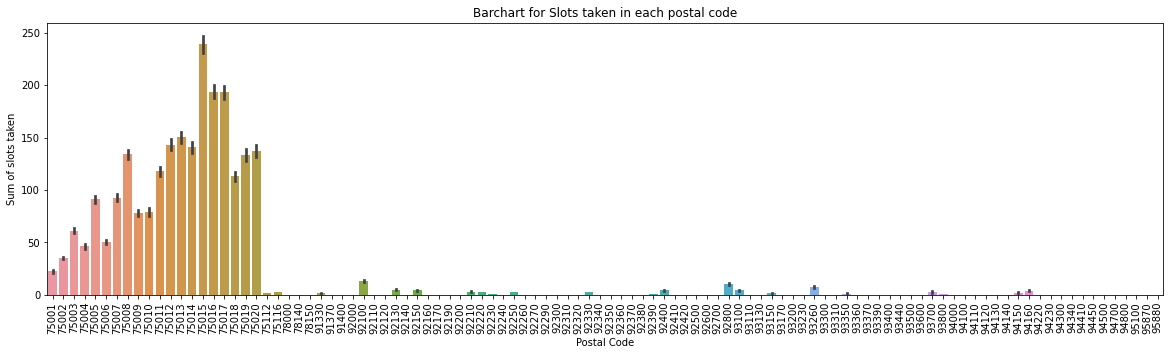

In [264]:
# Slots taken for each postal code

plt.figure(figsize=(20,5))
sns.barplot(df['postal_code'].sort_index(), df['slots_taken_sum'])


plt.title('Barchart for Slots taken in each postal code')
plt.xlabel('Postal Code')
plt.ylabel('Sum of slots taken')
plt.xticks(rotation=90)

plt.show()

The number of slots is still higher in the area code 75*. This is expected due to the high number of bluecars in the area.

In [ ]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
11180,93300,2018-01-01,1440,0,weekday,12,13,0,0,0,1,0,0
9655,92700,2018-01-01,1440,0,weekday,109,104,3,2,17,14,0,0
9188,92420,2018-01-01,1440,0,weekday,12,9,0,0,4,3,0,0
1716,75012,2018-01-01,1440,0,weekday,502,512,7,6,32,35,122,120


## Implementation

In [262]:
df['postal_code'].value_counts()

75001    156
75018    156
75005    156
93350    156
94230    156
        ... 
93440    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

<b>H0 : There is no difference between the number of bluecars in the area postal code 75015 and area postal code 75016.

H1: Number of bluecars in area postal code 75015 is larger than that in area postal code 75016.</b>

In [273]:
# Create a new dataframe that has noth postal code records only for the weekends.

df1 = df.loc[((df['postal_code'] == '75015') | (df['postal_code'] == '75016')) & (df['day_type'] == 'weekend'), ['postal_code','bluecars_taken_sum']]
df1.head()

,postal_code,bluecars_taken_sum
2345,75016,847
2189,75015,1061
2190,75015,913
2346,75016,842
2196,75015,1255


In [274]:
# Check value counts for each postal code
df1['postal_code'].value_counts()

# All areas are equally represented in our new dataframe i.e 44 weekend days.


75016    44
75015    44
Name: postal_code, dtype: int64

In [277]:
# Since we require only 50 records for our sample, we can use stratified sampling to maintain the proportion. 
# Our strata will be the postal codes. From each strata, records will be selected at random to make up our sample.
sample = df1.groupby(['postal_code'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=50/88))


In [276]:
sample.head()

,postal_code,bluecars_taken_sum
2263,75015,1186
2277,75015,1277
2249,75015,1127
2264,75015,981
2210,75015,1248


In [305]:
# Creating independent dataframes from our sample
pc75015 = sample[sample['postal_code'] == '75015']
pc75015.head()


,postal_code,bluecars_taken_sum
2190,75015,913
2277,75015,1277
2299,75015,899
2225,75015,1036
2336,75015,1209


In [306]:
pc75016 = sample[sample['postal_code'] == '75016']
pc75016.head()

,postal_code,bluecars_taken_sum
2448,75016,791
2461,75016,1088
2427,75016,738
2492,75016,988
2472,75016,978


In [307]:
# Check for variance equality
from scipy.stats import levene
levene(pc75016['bluecars_taken_sum'], pc75015['bluecars_taken_sum'])

# There is homogenity between variances

LeveneResult(statistic=0.6384846502729445, pvalue=0.42819638050376574)

In [289]:
# Calculating residuals
diff = pc75015['bluecars_taken_sum'].values - pc75016['bluecars_taken_sum'].values
diff

array([  122,   189,   161,    48,   231,   162,    58,   107,   330,
         332,    92,   197,   234,   380,   225,   282,   198,   296,
         429,   367, -1011,   162,   994,   272,   268])

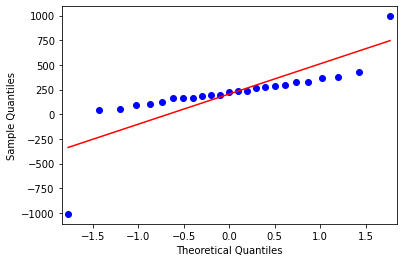

In [293]:
# Check for normality
from statsmodels.graphics.gofplots import qqplot

# Convert diff to a dataframe

# q-q plot
qqplot(diff, line='s')
plt.show()

# This implies that this data is not normally distributed

In [310]:
# In order to carry on with our test, we will have to fit the data into a normal distribution using MLE

from scipy.stats import norm

# Generating an array of 200 random sample from a normal dist with 
# mean 0 and stdv 1
#
random_sample = norm.rvs(loc=0,scale=1,size=200) 
mean, stdev = norm.fit(diff)
# Return mean and standrd deviation of the random sample
parameters = norm.fit(random_sample)
print(parameters)

# Use this to fit our difference data into a normal distribution
diff = norm.pdf(diff ,loc =parameters[0], scale =parameters[1])


(0.07085281448717642, 1.0565165185191578)


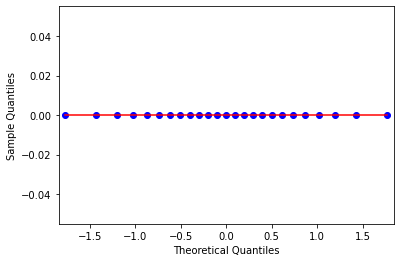

In [311]:
# Check for normality
from statsmodels.graphics.gofplots import qqplot

# Convert diff to a dataframe

# q-q plot
qqplot(diff, line='s')
plt.show()

# Our data is now normally distributed

In [319]:
# Since our n < 30 for each group, we will use t test

# Calculating necessary variables
# Calculate the mean and standard error
x1 = list(pc75015['bluecars_taken_sum'])
x1 = np.array(x1)
x2 = list(pc75016['bluecars_taken_sum'])
x2 = np.array(x2)

x1_bar, x2_bar = np.mean(x1), np.mean(x2)
n1, n2 = len(x1), len(x2)
var_x1, var_x2= np.var(x1, ddof=1), np.var(x2, ddof=1)

# pooled sample variance
pool_var = ( ((n1-1)*var_x1) + ((n2-1)*var_x2) ) / (n1+n2-2)

# standard error
std_error = np.sqrt(pool_var * (1.0 / n1 + 1.0 / n2))

# calculate t statistics
t = abs(x1_bar - x2_bar) / std_error
t

3.205763170112332

In [322]:
# Since our hypothesis test is one tailed(right_tailed), we shall get p_value for one tail

from scipy import stats

p = 1-stats.t.cdf(x=t, df=24)
p

# p_value < 0.05 hence we reject the null hypothesis in favour of the alternate hypothesis.
# Our hypothesis test is statistically significant
# There is enough evidence that the area postal code 75015 has more bluecars taken
# compared to area code 75016.

0.0018937300194887818

## Decision

The p_value < 0.05 hence we reject the null hypothesis in favour of the alternate hypothesis. This implies that our hypothesis test is statistically significant. There is enough evidence that the area postal code 75015 has more bluecars taken compared to area postal code 75016.

## Follow up Questions

a.) Did we have the right data?

Indeed we had the right data to answer the question.

## Conclusion

Despite our decision to reject the null hypothesis, we may require more data to challenge our solution since the data only contains records for 156 days and for a single year. This is not even half the number of days in a year. We may not be correct to generalize the state and assume that the area postal code 75015 always has the most number of bluecars taken.